In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv("Amazon Sale Report.csv")
data.head(5)

<ipython-input-16-552d3fba87db>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [17]:
data.shape

(128975, 24)

In [18]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', ' Amount ', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15   Amount             121180 non-nul

In [20]:
data.describe()

,index,Qty,ship-postal-code
count,128975.000000,128975.000000,128942.000000
mean,64487.000000,0.904431,463966.236509
std,37232.019822,0.313354,191476.764941
min,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,382421.000000
50%,64487.000000,1.000000,500033.000000
75%,96730.500000,1.000000,600024.000000
max,128974.000000,15.000000,989898.000000


In [21]:
data.dtypes

,0
index,int64
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object


In [22]:
data.drop(columns=['Order ID','Unnamed: 22','B2B','SKU','Style','Size','promotion-ids','index','ASIN','currency','ship-postal-code'],axis=1,inplace = True)
data.head(5)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,fulfilled-by
0,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Set,NaN,0,647.62,MUMBAI,MAHARASHTRA,IN,Easy Ship
1,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,Shipped,1,406.00,BENGALURU,KARNATAKA,IN,Easy Ship
2,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,kurta,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,IN,NaN
3,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Western Dress,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,IN,Easy Ship
4,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Top,Shipped,1,574.00,CHENNAI,TAMIL NADU,IN,NaN


In [23]:
data.columns = data.columns.str.strip()

In [24]:
data.drop(columns=['Sales Channel'],axis=1,inplace=True)

In [25]:
data.isnull().sum()

,0
Date,0
Status,0
Fulfilment,0
ship-service-level,0
Category,0
Courier Status,6872
Qty,0
Amount,7795
ship-city,33
ship-state,33


In [26]:
for col in data.columns:
  print(f"unique values of {col}")
  print(col,data[col].unique())

unique values of Date
Date ['4/30/2022' '4/29/2022' '4/28/2022' '4/27/2022' '4/26/2022' '4/25/2022'
 '4/24/2022' '4/23/2022' '4/22/2022' '4/21/2022' '4/20/2022' '4/19/2022'
 '4/18/2022' '4/17/2022' '4/16/2022' '4/15/2022' '4/14/2022' '4/13/2022'
 '4/12/2022' '4/11/2022' '4/10/2022' '4/9/2022' '4/8/2022' '4/7/2022'
 '4/6/2022' '4/5/2022' '4/4/2022' '4/3/2022' '4/2/2022' '4/1/2022'
 '3/31/2022' '5/31/2022' '5/30/2022' '5/29/2022' '5/28/2022' '5/27/2022'
 '5/26/2022' '5/25/2022' '5/24/2022' '5/23/2022' '5/22/2022' '5/21/2022'
 '5/20/2022' '5/19/2022' '5/18/2022' '5/17/2022' '5/16/2022' '5/15/2022'
 '5/14/2022' '5/13/2022' '5/12/2022' '5/11/2022' '5/10/2022' '5/9/2022'
 '5/8/2022' '5/7/2022' '5/6/2022' '5/5/2022' '5/4/2022' '5/3/2022'
 '5/2/2022' '5/1/2022' '6/29/2022' '6/28/2022' '6/27/2022' '6/26/2022'
 '6/25/2022' '6/24/2022' '6/23/2022' '6/22/2022' '6/21/2022' '6/20/2022'
 '6/19/2022' '6/18/2022' '6/17/2022' '6/16/2022' '6/15/2022' '6/14/2022'
 '6/13/2022' '6/12/2022' '6/11/2022' '6/10

In [27]:
m_values = data.isnull().sum() / len(data) * 100
m_values= m_values[m_values > 0]
print(m_values)

Courier Status     5.328164
Amount             6.043807
ship-city          0.025586
ship-state         0.025586
ship-country       0.025586
fulfilled-by      69.546811
dtype: float64


In [28]:
data['Courier Status'] = data['Courier Status'].fillna(data['Courier Status'].mode()[0])
data['ship-city'] = data['ship-city'].fillna(data['ship-city'].mode()[0])
data['ship-state'] = data['ship-state'].fillna(data['ship-state'].mode()[0])
data['ship-country'] = data['ship-country'].fillna(data['ship-country'].mode()[0])




In [29]:
data['Amount'] = data['Amount'].str.replace(',', '').str.strip()
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

In [30]:
data['Amount'] = data['Amount'].fillna(data['Amount'].median())

In [31]:
data.drop(['fulfilled-by'],axis=1,inplace=True)

In [32]:
data.isnull().sum()

,0
Date,0
Status,0
Fulfilment,0
ship-service-level,0
Category,0
Courier Status,0
Qty,0
Amount,0
ship-city,0
ship-state,0


In [33]:
data.duplicated().sum()

np.int64(11947)

In [34]:
dup_col = []

for col in data.columns:
    if data[col].duplicated().any():
        dup_col.append(col)
print(f"duplicated column is {col}")

duplicated column is ship-country


In [35]:
data = data.drop_duplicates()

In [36]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
Date,object
Status,object
Fulfilment,object
ship-service-level,object
Category,object
Courier Status,object
Qty,int64
Amount,float64
ship-city,object
ship-state,object


In [37]:
data.head(5)

,Date,Status,Fulfilment,ship-service-level,Category,Courier Status,Qty,Amount,ship-city,ship-state,ship-country
0,4/30/2022,Cancelled,Merchant,Standard,Set,Shipped,0,647.62,MUMBAI,MAHARASHTRA,IN
1,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,kurta,Shipped,1,406.00,BENGALURU,KARNATAKA,IN
2,4/30/2022,Shipped,Amazon,Expedited,kurta,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,IN
3,4/30/2022,Cancelled,Merchant,Standard,Western Dress,Shipped,0,753.33,PUDUCHERRY,PUDUCHERRY,IN
4,4/30/2022,Shipped,Amazon,Expedited,Top,Shipped,1,574.00,CHENNAI,TAMIL NADU,IN


In [38]:
data['Date'] = pd.to_datetime(data['Date']).astype(int) // 10**9

In [39]:
en = pd.get_dummies(data['Status'],prefix='Status',drop_first=True).astype(int)
data = pd.concat([data,en],axis=1)
data.drop(columns=['Status'],axis=1,inplace=True)
data.head(5)

,Date,Fulfilment,ship-service-level,Category,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,...,Status_Shipped,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Status_Shipping
0,1651276800,Merchant,Standard,Set,Shipped,0,647.62,MUMBAI,MAHARASHTRA,IN,...,0,0,0,0,0,0,0,0,0,0
1,1651276800,Merchant,Standard,kurta,Shipped,1,406.00,BENGALURU,KARNATAKA,IN,...,0,0,1,0,0,0,0,0,0,0
2,1651276800,Amazon,Expedited,kurta,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,IN,...,1,0,0,0,0,0,0,0,0,0
3,1651276800,Merchant,Standard,Western Dress,Shipped,0,753.33,PUDUCHERRY,PUDUCHERRY,IN,...,0,0,0,0,0,0,0,0,0,0
4,1651276800,Amazon,Expedited,Top,Shipped,1,574.00,CHENNAI,TAMIL NADU,IN,...,1,0,0,0,0,0,0,0,0,0


In [41]:
le = LabelEncoder()
columns_to_encode = ['Fulfilment','ship-service-level', 'Category', 'Courier Status','ship-city','ship-state','ship-country','Status_Pending']
for col in columns_to_encode:
    data[col] = le.fit_transform(data[col])

In [42]:
data.dtypes

,0
Date,int64
Fulfilment,int64
ship-service-level,int64
Category,int64
Courier Status,int64
Qty,int64
Amount,float64
ship-city,int64
ship-state,int64
ship-country,int64


In [43]:
for col in data.columns:
  print(f"unique values of {col}")
  print(col,data[col].unique())

unique values of Date
Date [1651276800 1651190400 1651104000 1651017600 1650931200 1650844800
 1650758400 1650672000 1650585600 1650499200 1650412800 1650326400
 1650240000 1650153600 1650067200 1649980800 1649894400 1649808000
 1649721600 1649635200 1649548800 1649462400 1649376000 1649289600
 1649203200 1649116800 1649030400 1648944000 1648857600 1648771200
 1648684800 1653955200 1653868800 1653782400 1653696000 1653609600
 1653523200 1653436800 1653350400 1653264000 1653177600 1653091200
 1653004800 1652918400 1652832000 1652745600 1652659200 1652572800
 1652486400 1652400000 1652313600 1652227200 1652140800 1652054400
 1651968000 1651881600 1651795200 1651708800 1651622400 1651536000
 1651449600 1651363200 1656460800 1656374400 1656288000 1656201600
 1656115200 1656028800 1655942400 1655856000 1655769600 1655683200
 1655596800 1655510400 1655424000 1655337600 1655251200 1655164800
 1655078400 1654992000 1654905600 1654819200 1654732800 1654646400
 1654560000 1654473600 1654387200 1

In [44]:
data.head(5)

,Date,Fulfilment,ship-service-level,Category,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,...,Status_Shipped,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Status_Shipping
0,1651276800,1,1,5,1,0,647.62,4795,28,0,...,0,0,0,0,0,0,0,0,0,0
1,1651276800,1,1,8,1,1,406.00,776,23,0,...,0,0,1,0,0,0,0,0,0,0
2,1651276800,0,0,8,1,1,329.00,5353,28,0,...,1,0,0,0,0,0,0,0,0,0
3,1651276800,1,1,7,1,0,753.33,6140,43,0,...,0,0,0,0,0,0,0,0,0,0
4,1651276800,0,0,6,1,1,574.00,1466,56,0,...,1,0,0,0,0,0,0,0,0,0


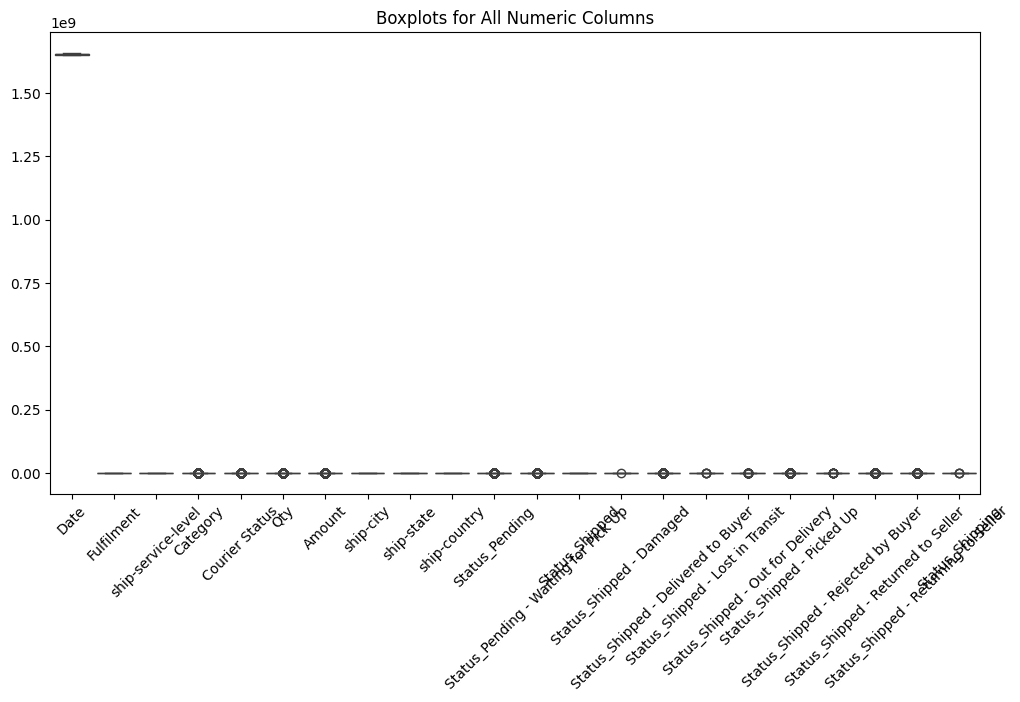

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title("Boxplots for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [46]:
def detect_outliers_iqr(data):
    for col in data.select_dtypes(include='number').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower) | (data[col] > upper)]

        print(f"{col}: {len(outliers)} outliers")



In [47]:
detect_outliers_iqr(data)

Date: 0 outliers
Fulfilment: 0 outliers
ship-service-level: 0 outliers
Category: 886 outliers
Courier Status: 10847 outliers
Qty: 11412 outliers
Amount: 4285 outliers
ship-city: 0 outliers
ship-state: 0 outliers
ship-country: 0 outliers
Status_Pending: 637 outliers
Status_Pending - Waiting for Pick Up: 262 outliers
Status_Shipped: 0 outliers
Status_Shipped - Damaged: 1 outliers
Status_Shipped - Delivered to Buyer: 27000 outliers
Status_Shipped - Lost in Transit: 4 outliers
Status_Shipped - Out for Delivery: 35 outliers
Status_Shipped - Picked Up: 947 outliers
Status_Shipped - Rejected by Buyer: 11 outliers
Status_Shipped - Returned to Seller: 1930 outliers
Status_Shipped - Returning to Seller: 141 outliers
Status_Shipping: 3 outliers


In [48]:
def remove_outliers_iqr(data):
    for col in data.select_dtypes(include='number').columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

        data = data[(data[col] >= lower) & (data[col] <= upper)]

    return data


df_cleaned = remove_outliers_iqr(data)

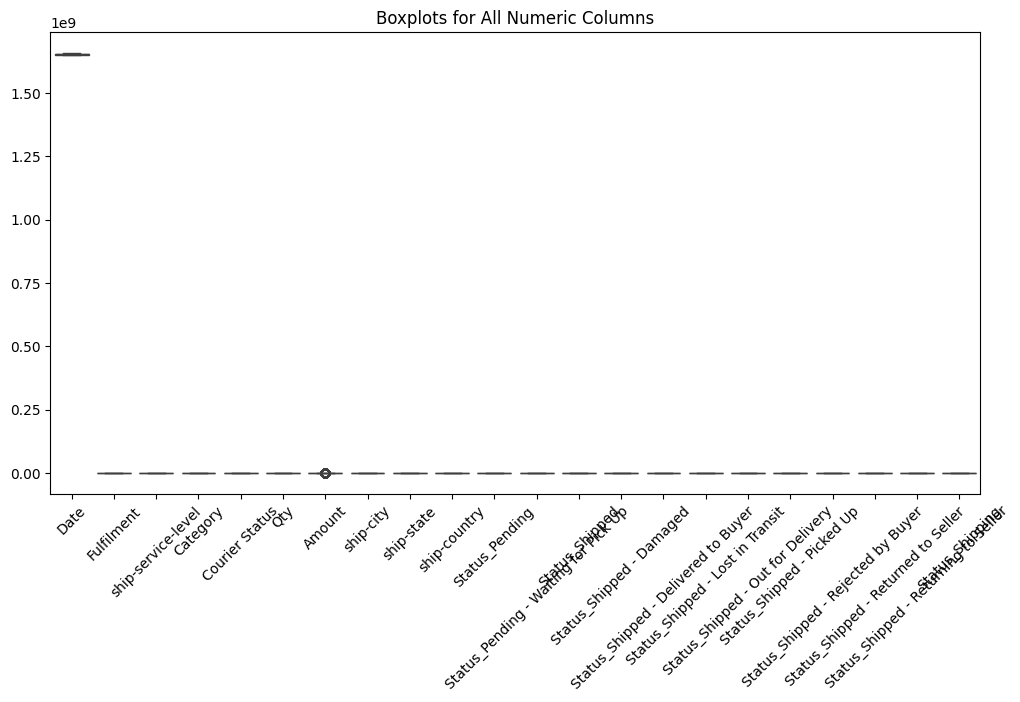

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=remove_outliers_iqr(data))
plt.title("Boxplots for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [50]:
scaler = StandardScaler()
data['Amount_scaled'] = scaler.fit_transform(data[['Amount']])
data.drop(columns=['Amount'],axis=1,inplace=True)
print(data['Amount_scaled'])

0        -0.054807
1        -0.977872
2        -1.272037
3         0.349038
4        -0.336059
            ...   
128970   -0.553817
128971    1.287576
128972    0.107098
128973    2.051639
128974    0.130020
Name: Amount_scaled, Length: 117028, dtype: float64


In [51]:
data.head(5)

,Date,Fulfilment,ship-service-level,Category,Courier Status,Qty,ship-city,ship-state,ship-country,Status_Pending,...,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Status_Shipping,Amount_scaled
0,1651276800,1,1,5,1,0,4795,28,0,0,...,0,0,0,0,0,0,0,0,0,-0.054807
1,1651276800,1,1,8,1,1,776,23,0,0,...,0,1,0,0,0,0,0,0,0,-0.977872
2,1651276800,0,0,8,1,1,5353,28,0,0,...,0,0,0,0,0,0,0,0,0,-1.272037
3,1651276800,1,1,7,1,0,6140,43,0,0,...,0,0,0,0,0,0,0,0,0,0.349038
4,1651276800,0,0,6,1,1,1466,56,0,0,...,0,0,0,0,0,0,0,0,0,-0.336059


In [52]:
data.columns

Index(['Date', 'Fulfilment', 'ship-service-level', 'Category',
       'Courier Status', 'Qty', 'ship-city', 'ship-state', 'ship-country',
       'Status_Pending', 'Status_Pending - Waiting for Pick Up',
       'Status_Shipped', 'Status_Shipped - Damaged',
       'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Status_Shipping',
       'Amount_scaled'],
      dtype='object')

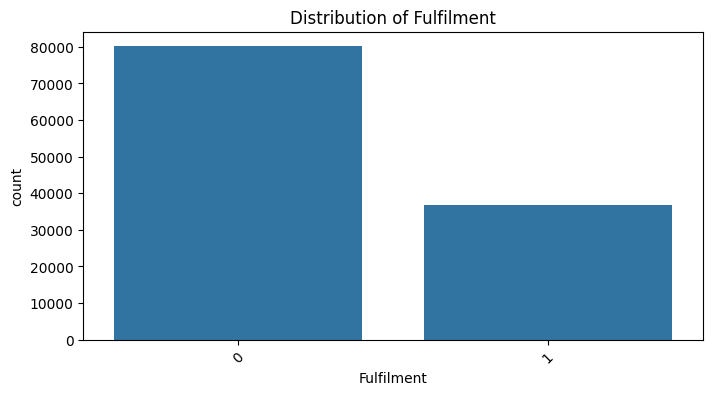

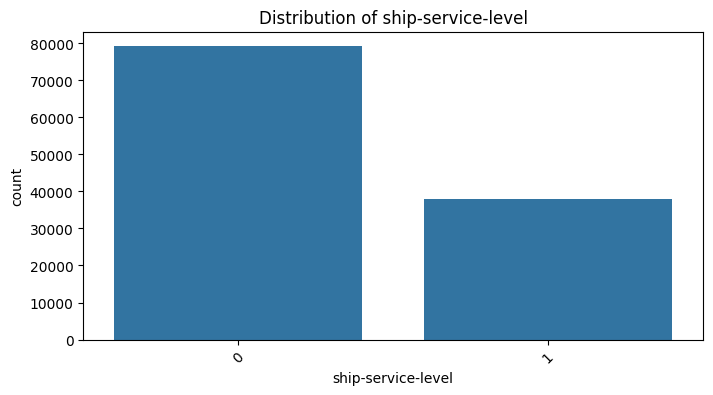

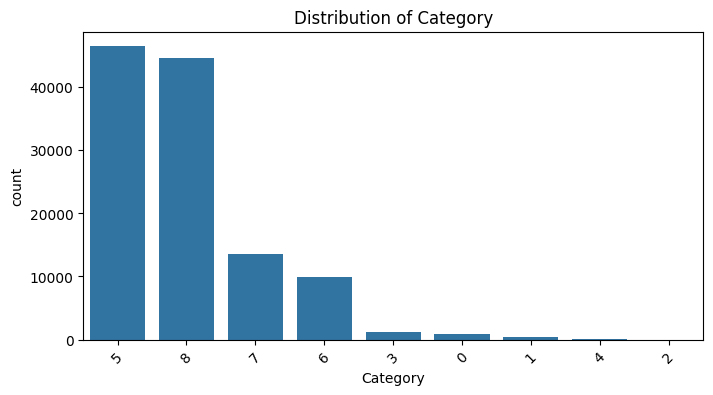

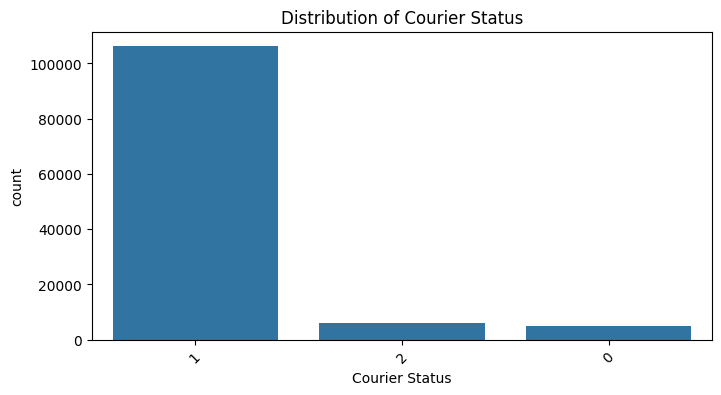

In [53]:
categorical_cols = ['Fulfilment', 'ship-service-level', 'Category', 'Courier Status']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

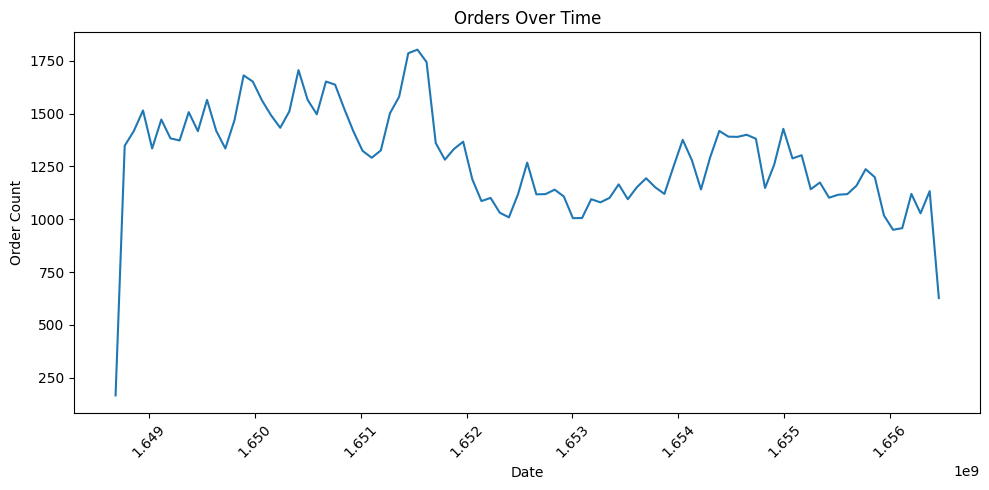

In [ ]:
plt.figure(figsize=(10, 5))
data['Date'].value_counts().sort_index().plot()
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

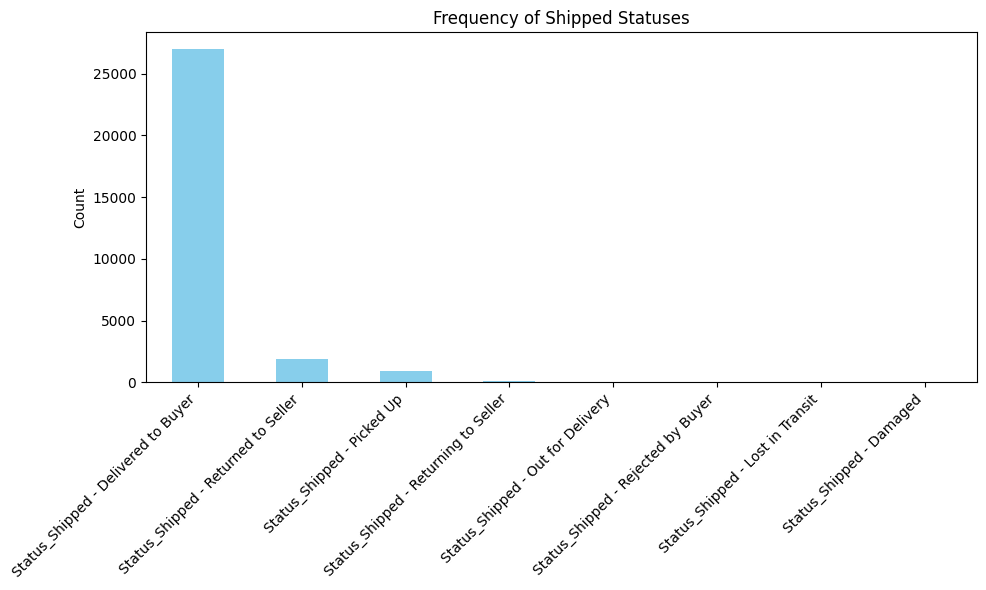

In [ ]:
shipped_status_cols = [
     'Status_Shipped - Damaged',
    'Status_Shipped - Delivered to Buyer', 'Status_Shipped - Lost in Transit',
    'Status_Shipped - Out for Delivery', 'Status_Shipped - Picked Up',
    'Status_Shipped - Rejected by Buyer', 'Status_Shipped - Returned to Seller',
    'Status_Shipped - Returning to Seller'
]

status_counts = data[shipped_status_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
status_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Shipped Statuses")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

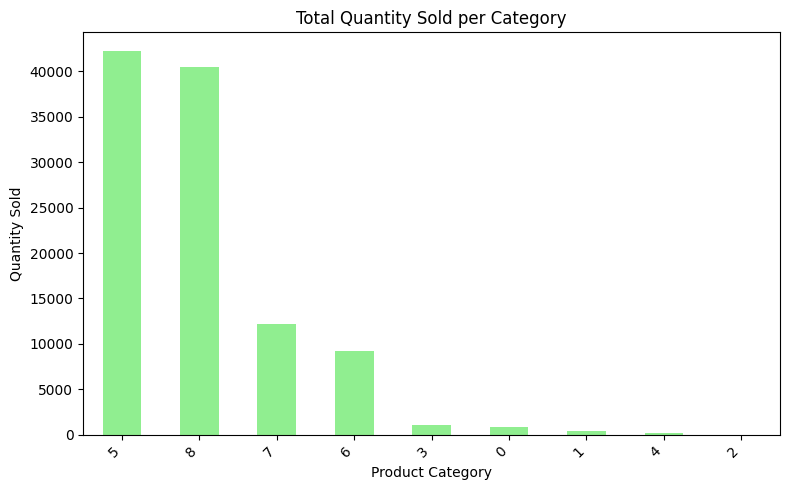

In [ ]:
category_qty = data.groupby('Category')['Qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
category_qty.plot(kind='bar', color='lightgreen')
plt.title('Total Quantity Sold per Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()